### Plot read counts on chromosome X versus autosomes across 100 individuals chosen from the 1000 Genomes Project

In [22]:
# turn on inline plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import os.path

In [3]:
# Convinience definitions (data locations, etc)

# the files are in the data subdirectory
baseDir='./data/'

fnSampleInfo = '%s/%s'%( baseDir, 'sample_info.txt' )
fnReadCounts = '%s/%s'%( baseDir, 'read_counts_by_indiv_and_chrom.txt' )

fnSampleList = '%s/%s'%( baseDir, 'sample_names.txt' )

#### open the table of per-sample information (sex, population, etc)

In [4]:
fileSampleInfo = open(fnSampleInfo,'r')

In [5]:
line = fileSampleInfo.readline()

In [6]:
line = line.rstrip()
line

'Sample\tFamily ID\tPopulation\tPopulation Description\tGender'

In [7]:
line = line.split('\t')
line

['Sample', 'Family ID', 'Population', 'Population Description', 'Gender']

In [8]:
sampleName = line[0]
print sampleName

Sample


In [9]:
sampleSex = line[4]
print sampleSex

Gender


In [ ]:
# now up and rerun line = fileSampleInfo.readline()  (In[5])
# and rerun the readline and split commands
# what has changed?

In [10]:
# a routine to parse the sample table, line-by-line, into a 
# dictionary mapping [individual name]-->[sex]

def parseSampleTable( filename ):
    fileSampTable = open(filename,'r')
    
    # skip past the file header
    fileSampTable.readline()

    sampleToSex={}
    
    # go line by line
    for line in fileSampTable:
        line = line.rstrip().split('\t')
        sampleToSex[ line[0] ] = line[4]
    
    return sampleToSex

In [11]:
sampToSex = parseSampleTable( fnSampleInfo )

In [12]:
#what is the sex of individual HG00099?
sampToSex[ 'HG00099' ]

'female'

#### What is the total number of males and females in this table?

In [13]:
n_male = 0
n_female = 0
for sample in sampToSex:
    if sampToSex[sample] == 'male':
        n_male+=1
    elif sampToSex[sample] == 'female':
        n_female+=1

print 'found ',n_male, 'males'
print 'found ',n_female, 'females'

found  1740 males
found  1760 females


####  Read count information

In [14]:
# e.g., let's look at one file
fnReadCounts = '%s/NA18627.stats.txt'%( baseDir )
filReadCounts = open(fnReadCounts,'r')
line = filReadCounts.readline()

In [15]:
line

'1\t249250621\t19054072\t64720\n'

In [16]:
line = line.rstrip().split('\t')
print line

['1', '249250621', '19054072', '64720']


### Load the list of samples I preprocessed

In [31]:
lSampleNames = [ line.strip() for line in open(fnSampleList,'r') ]
print lSampleNames[:4]
print len(lSampleNames)


['NA20803', 'HG04176', 'HG03824', 'NA19652']
100


### Routine to load the autosomal and chrX read count sums from one individual

In [17]:
def loadAutoAndXCounts( directory, sampName ):
    filename = '%s/%s.stats.txt'%( directory, sampName )
    fileReadCounts = open(filename,'r')
    
    lChromNamesAutosomes = [ '%d'%i for i in range(1,23) ]
    
    nAutosomalReads = 0
    nXReads = 0
    
    for line in fileReadCounts:
        line = line.rstrip().split('\t')
        if line[0] in lChromNamesAutosomes:
            nAutosomalReads += int( line[2] )
        elif line[0] == 'X':
            nXReads += int( line[2] )
        # line goes chromosome, chromosome size, number of mapped reads, number of unmapped reads
        
    return nAutosomalReads, nXReads

In [83]:
loadAutoAndXCounts( baseDir, 'NA18627')

(224463998, 12606641)

### Routine to load the each chromosome read counts from one individual

In [73]:
def loadPerChromCounts( directory, sampName ):
    filename = '%s/%s.stats.txt'%( directory, sampName )
    fileReadCounts = open(filename,'r')
    
    lChromosomes = []
    lReadCounts = [] 
    lChromSizes = []
        
    for line in fileReadCounts:
        line = line.rstrip().split('\t')
        lChromosomes.append( line[0] )
        lReadCounts.append( int(line[2]) )
        lChromSizes.append( int(line[1]) )
        
    return lChromosomes, lReadCounts, lChromSizes

In [74]:
lChromosomes,lReadCounts,lChromSizes = loadPerChromCounts( baseDir, 'NA18627')

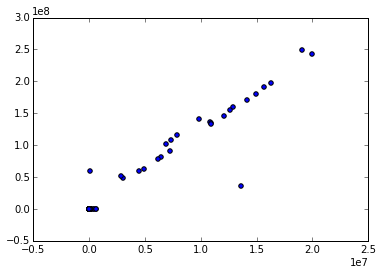

In [75]:
plt.scatter( lReadCounts, lChromSizes )

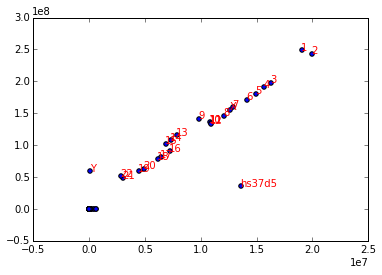

In [76]:
plt.scatter( lReadCounts, lChromSizes )
for i in range(len(lReadCounts)):
    if lChromSizes[i]>1e7:
        plt.text( lReadCounts[i], lChromSizes[i], s=lChromosomes[i], color='red' )

In [84]:
lFracXMale=[]
lFracXFemale=[]
for sample in lSampleNames:
    countAuto,countX = loadAutoAndXCounts( baseDir,  sample )

    if sampToSex[sample]=='male':
        lFracXMale.append( countX / float(countAuto+countX) )
    elif sampToSex[sample]=='female':
        lFracXFemale.append( countX / float(countAuto+countX) )
    
    

In [87]:
lFracXMale[0:10]

[0.02761035261353097,
 0.02775615501801825,
 0.029240938756321326,
 0.027870699590811697,
 0.028455116235877407,
 0.02868283944326584,
 0.02780504586855437,
 0.028867914330147446,
 0.027349902803539303,
 0.028001900196464223]

In [88]:
lFracXFemale[0:10]

[0.05653371177709138,
 0.05268894812323853,
 0.057011431369219566,
 0.05157540371326981,
 0.05353001549750549,
 0.05407142462581126,
 0.05157379614572769,
 0.03167725193714202,
 0.05486908474215978,
 0.04889294416035746]

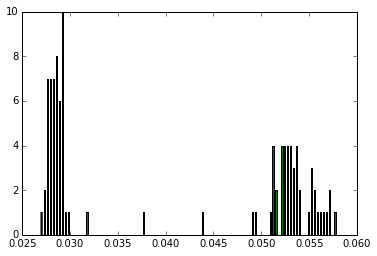

In [86]:
_ = plt.hist( [lFracXMale,lFracXFemale],  bins=100 )

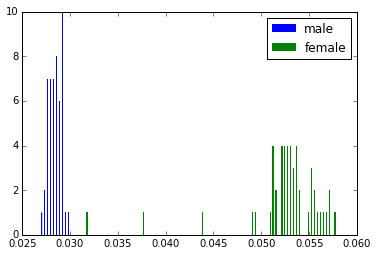

In [89]:
_ = plt.hist( [lFracXMale,lFracXFemale],  bins=100, label=['male','female'], edgecolor='none' )
plt.legend()